In [2]:
# ライブラリのインポート

from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# データを読み込む

iris = datasets.load_iris()

# データを見てみる
#print(iris)
print("Data")
print(iris.data.__class__)
print(iris.data)
print("Classes ", iris.target_names)
print(iris.target.__class__)
print(iris.target)

Data
<class 'numpy.ndarray'>
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.

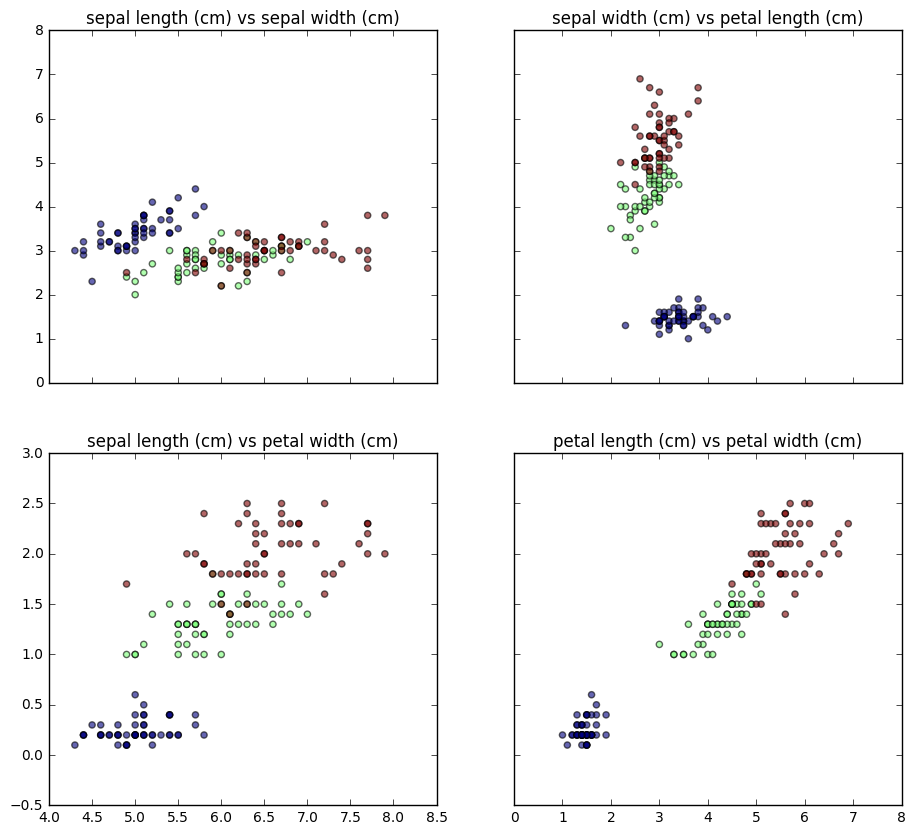

In [5]:
# データをプロットしてみる

plt.clf()
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(11, 10))

axarr[0, 0].scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, alpha=0.6)
axarr[0, 0].set_title(iris.feature_names[0] + " vs " + iris.feature_names[1])

axarr[0, 1].scatter(iris.data[:, 1], iris.data[:, 2], c=iris.target, alpha=0.6)
axarr[0, 1].set_title(iris.feature_names[1] + " vs " + iris.feature_names[2])

axarr[1, 0].scatter(iris.data[:, 0], iris.data[:, 3], c=iris.target, alpha=0.6)
axarr[1, 0].set_title(iris.feature_names[0] + " vs " + iris.feature_names[3])

axarr[1, 1].scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, alpha=0.6)
axarr[1, 1].set_title(iris.feature_names[2] + " vs " + iris.feature_names[3])

plt.show()

In [6]:
# 単純化のために2次元で扱う
X = iris.data[:, [0, 3]]
y = iris.target

#　識別器のインスタンスをつくる
svm = SVC(kernel='rbf', probability=True)

# 学習させる
svm.fit(X, y)

# 予測する
print(svm.predict([X[0]]))
print(svm.predict([X[100]]))
print(svm.predict([[4.5, 1.1]]))

[0]
[2]
[1]


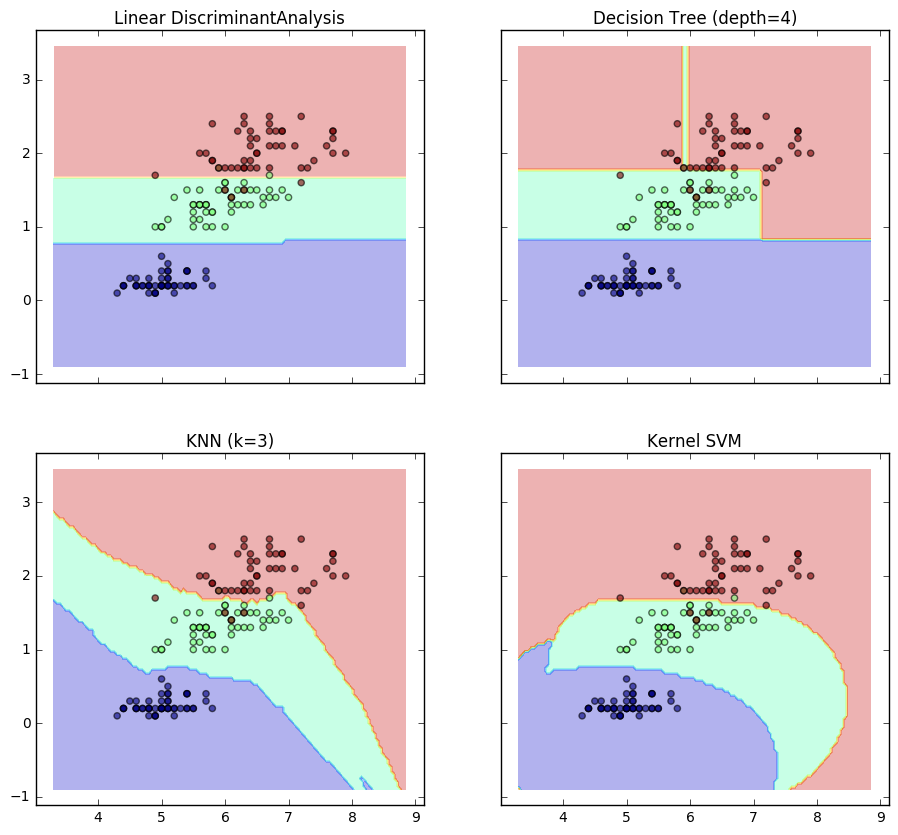

In [7]:
# 他の識別器も同じ使い方
classifiers = [
    LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
    DecisionTreeClassifier(max_depth=4),
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel='rbf', probability=True),
    ]

for classifier in classifiers:
    classifier.fit(X, y)

# Plotting decision regions
plt.clf()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(11, 10))

for index, classifier, title in zip([0, 1, 2, 3], classifiers, ['Linear DiscriminantAnalysis', 'Decision Tree (depth=4)', 'KNN (k=3)', 'Kernel SVM', 'Liner SVM']):
    predicted = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    predicted = predicted.reshape(xx.shape)
    
    #     print(predicted)
    axarr[index // 2, index % 2].contourf(xx, yy, predicted, alpha=0.3)
    axarr[index // 2, index % 2].scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)
    axarr[index // 2, index % 2].set_title(title)
    
plt.show()

In [12]:
# 精度を計る

training_indices = np.random.choice(150, size=100, replace=False)
test_indices = list(set(np.arange(150)) - set(training_indices))

training_x = X[training_indices]
training_y = y[training_indices]
test_x = X[test_indices]
test_y = y[test_indices]

print("training size: ",training_x.shape)
print("test size: ", test_x.shape)

svm = SVC(kernel='rbf', probability=True)
svm.fit(training_x, training_y)

print("Score for training set = ", svm.score(training_x, training_y))
print("Score for test set       = ", svm.score(test_x, test_y))

training size:  (100, 2)
test size:  (50, 2)
Score for training set =  0.96
Score for test set       =  0.96


In [13]:
# クロスバリデーションスコアを計算してみる

# TODO
def cross_validation_score(clf, data, target):
    return 0

for clf in classifiers:
    clf.fit(training_x, training_y)

    score = cross_validation_score(clf, training_x, training_y)
    
    print("Cross Validation Score = ", score)

Cross Validation Score =  0
Cross Validation Score =  0
Cross Validation Score =  0
Cross Validation Score =  0
